# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile AplusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing AplusB.cpp


In [ ]:
!g++ AplusB.cpp -o sum
!./sum

5 9
14

In [ ]:
!g++ AplusB.cpp -o sum
!./sum

15 89
104

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./sum < input1.txt

12

In [ ]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

4 8
12


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

Brute force

In [150]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product1.cpp


In [155]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

8
24 68 93 49 3109 4912 134 12
15271408


### Test 1: lagest input numbers 200000 200000 in the input

In [3]:
%%writefile input1.txt
5
1 3 200000 9 200000 23

Writing input1.txt


In [ ]:
!./max_pairwise_product1 < input1.txt

1345294336


Fixing integer overflow

In [158]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <chrono>

using namespace std;
using namespace std::chrono;

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;

    auto start = high_resolution_clock::now();

    cin >> n;
    vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        cin >> numbers[i];
    }

    cout << MaxPairwiseProduct(numbers) << "\n";

    auto stop = high_resolution_clock::now();

    auto duration = duration_cast<microseconds>(stop - start);
  
    cout << "Time taken by function: "
         << duration.count() << " microseconds" << endl;

    return 0;
}


Overwriting max_pairwise_product2.cpp


In [159]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

40000000000
Time taken by function: 56 microseconds


### Integer overflow Stress Test

In [153]:
%%writefile StressTest.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

vector <int> a;

int MaxPairwiseProduct1(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

long long MaxPairwiseProduct2(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {

    while (true) {

        int n = rand() % 10 + 2;
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            a.push_back(rand() % 200000 + 10000);
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        int res1 = MaxPairwiseProduct1(a);
        long long res2 = MaxPairwiseProduct2(a);

        if (res1 != res2) {
            cout << "Wrong answer: " << res1 << " " << res2 << "\n";
            break;
        }
        else {
            cout << "OK\n";
        }

    }


}

Overwriting StressTest.cpp


In [154]:
!g++ StressTest.cpp -o stresst
!./stresst

5
140886 102777 46915 157793 48335 
Wrong answer: 1594938534 22230824598


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

In [7]:
%%writefile generate_Test1.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;

FILE *outfile;
vector <int> a;

int main() {

    int n = 200000;

    outfile = fopen("Test1.txt", "w");

    fprintf(outfile, "%d\n", n);

    fprintf(outfile, "%d ", 200000);
    fprintf(outfile, "%d ", 200000);

    for (long long i=0; i<198000; i++) {
        fprintf(outfile, "%d ", (rand() % 200000 + 1));

    }

    return 0;


}

Overwriting generate_Test1.cpp


In [9]:
!g++ generate_Test1.cpp -o genst
!./genst

In [10]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < Test1.txt

40000000000
Time taken by function: 126411968 microseconds


### Efficient solution

In [34]:
%%writefile max_pairwise_product_ef.cpp
#include <cstdlib>
#include <iostream>
#include <vector>
#include <chrono>

using namespace std;
using namespace std::chrono;

long long MaxPairwiseProductFast(const vector<int> &numbers) {
    int n = numbers.size();

    int max_index1 = -1;
    for (int i = 0; i < n; ++i)
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1]))
            max_index1 = i;

    int max_index2 = -1;
    for (int j = 0; j < n; ++j)
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2])))
            max_index2 = j;

    return ((long long) (numbers[max_index1])) * numbers[max_index2];
}

int main() {
    
    auto start = high_resolution_clock::now();
    
    int n;
    cin >> n;
    vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        cin >> numbers[i];
    }

    long long result = MaxPairwiseProductFast(numbers);
    cout << result << "\n";

    auto stop = high_resolution_clock::now();

    auto duration = duration_cast<microseconds>(stop - start);
  
    cout << "Time taken by function: "
         << duration.count() << " microseconds" << endl;

    return 0;
    
}

Overwriting max_pairwise_product_ef.cpp


Measure with test file of the maximun n 200000 numbers

In [35]:
!g++ max_pairwise_product_ef.cpp -o max_pairwise_product_ef
!./max_pairwise_product_ef < Test1.txt

40000000000
Time taken by function: 59840 microseconds


### Final super efficient solution 

In [22]:
%%writefile max_pairwise_product_superef.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <chrono>

using namespace std;
using namespace std::chrono;

int main() {
    
    auto start = high_resolution_clock::now();
    
    int n;
    int actual_num;
    int aux;
    int max1 = -1;
    int max2 = -1;
    cin >> n;

    for (int i = 0; i < n; ++i) {
        cin >> actual_num;

        if (max1 == -1) {
            max1 = actual_num;
        }
        
        else if (actual_num > max1) {
            aux = max1;
            max1 = actual_num;
            max2 = aux;
        }
        
        else if ((actual_num == -1) || (actual_num > max2)) {
            max2 = actual_num;
        }
        
    }

    cout << (long long) max1*max2 << "\n";

    auto stop = high_resolution_clock::now();

    auto duration = duration_cast<microseconds>(stop - start);
  
    cout << "Time taken by function: "
         << duration.count() << " microseconds" << endl;

    return 0;
    
}

Writing max_pairwise_product_superef.cpp


Measure with test file of the maximun n 200000 numbers

In [16]:
!g++ max_pairwise_product_superef.cpp -o max_pairwise_product_superef
!./max_pairwise_product_superef < Test1.txt

40000000000
Time taken by function: 54687 microseconds


### Stress Test (Brute force vs Super efficient solution)

In [144]:
%%writefile StressTest1.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using namespace std;

vector <int> a;

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    
      int n;
      vector <int> a;
      int actual_num;
      int aux;
    
      for (int i=0; i<2; i++) {
          
          if (i == 0) {
              n = rand() % 10 + 1;
          }
          else {
              n = 200000;
          }

          int max1 = -1;
          int max2 = -1;

          cout << "Number of cases: " << n << "\n";
          a.clear();


          for (int j=0; j<n; j++) {
              
              if (j == 0 || j == n-1) {
                  actual_num = 200000;
              }
              
              else {
                  actual_num = rand() % 200000 + 1;
              }

              a.push_back(actual_num);

              if (max1 == -1) {
                  max1 = actual_num;
              }
              
              else if (actual_num > max1) {
                  aux = max1;
                  max1 = actual_num;
                  max2 = aux;
              }
              
              else if ((actual_num == -1) || (actual_num > max2)) {
                  max2 = actual_num;
              }
          }

          long long res1 = MaxPairwiseProduct(a);
          long long res2 = (long long) max1*max2;

          if (res1 != res2) {
              cout << "Wrong answer: " << res1 << " " << res2 << "\n";
              break;
          }
          else {
              cout << "Answer1: " << res1 << " " << "Answer2: " << res2 << "\n";
              cout << "OK\n\n";
          }   
      }


}

Overwriting StressTest1.cpp


In [145]:
!g++ StressTest1.cpp -o StressTest1
!./StressTest1

Number of cases: 4
Answer1: 40000000000 Answer2: 40000000000
OK

Number of cases: 200000
Answer1: 40000000000 Answer2: 40000000000
OK



## Python

In [134]:
%%writefile max_pairwise_productp.py

import time

def max_pairwise_product(n, a):

    result = 0

    for i in range(0, n):
        for j in range(i + 1, n):
            if a[i] * a[j] > result:
                result = a[i] * a[j]
    return result


if __name__ == '__main__':

    start = time.time()

    n = int(input())
    a = [int(x) for x in input().split()]

    print(max_pairwise_product(n, a))

    end = time.time()

    print("Time taken:", end-start, "seconds")

Overwriting max_pairwise_productp.py


In [135]:
!python max_pairwise_productp.py

4
92348 27348 2842 424
2525533104
Time taken: 5.16373872756958 seconds


### Test 1: lagest input numbers 200000 200000 in the input

In [160]:
%%writefile input1.txt
7
13 36 124 200000 9 200000 23

Overwriting input1.txt


In [161]:
!python max_pairwise_productp.py < input1.txt

40000000000
Time taken: 8.845329284667969e-05 seconds


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

In [129]:
from random import randint

test = open("Test2.txt", "w")

n = 200000

test.write(str(n) + "\n")

test.write(str(200000) + " ")
test.write(str(200000) + " ")

for i in range(n-2):
    test.write(str(randint(1, 200000)) + " ")

In [132]:
!python max_pairwise_productp.py < Test2.txt

40000000000
Time taken: 2416.6974835395813 seconds


##Efficient solution

In [ ]:
%%writefile max_pairwise_product_fastp.py
import time

def max_pairwise_product_fast(n, numbers):
    max_index1 = -1
    for i in range(n):
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:
            max_index1 = i

    max_index2 = -1
    for i in range(n):
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):
            max_index2 = i

    return numbers[max_index1] * numbers[max_index2]


if __name__ == '__main__':

    start = time.time()

    n = int(input())
    a = [int(x) for x in input().split()]

    print(max_pairwise_product_fast(n, a))

    end = time.time()

    print("Time taken:", end-start, "seconds")

Overwriting max_pairwise_product_fastp.py


Measure with test file of the maximun n 200000 numbers

In [133]:
!python max_pairwise_product_fastp.py < Test2.txt

40000000000
Time taken: 0.3554689884185791 seconds


### Final super efficient solution

In [138]:
%%writefile max_pairwise_product_superefp.py

import time

if __name__ == '__main__':

    start = time.time()

    n = int(input())
    a = [int(x) for x in input().split()]
    max1 = -1
    max2 = -1

    for actual_num in a:
        if max1 == -1:
            max1 = actual_num
        
        elif actual_num > max1:
            aux = max1
            max1 = actual_num
            max2 = aux
        
        elif (actual_num == -1) or (actual_num > max2):
            max2 = actual_num

    print(max1*max2)

    end = time.time()

    print("Time taken:", end-start, "seconds")


Overwriting max_pairwise_product_superefp.py


Measure with test file of the maximun n 200000 numbers

In [141]:
!python max_pairwise_product_superefp.py

40000000000
Time taken: 0.3484072685241699 seconds


### Stress Test (Brute force vs Super efficient solution)

In [149]:
from random import randint

def max_pairwise_product(n, a):

    result = 0

    for i in range(0, n):
        for j in range(i + 1, n):
            if a[i] * a[j] > result:
                result = a[i] * a[j]
    return result

if __name__ == '__main__':

    for i in range(2):
      
      if i==0:
          n = randint(2, 10)
      
      elif i==1:
          n = 200000

      print("Number of cases:", n)

      a = []
      max1 = -1
      max2 = -1

      for j in range(n):

          if j==0 or j==n-1:
              actual_num = 200000
          else:
              actual_num = randint(1, 200000)

          a.append(actual_num)

          if max1 == -1:
              max1 = actual_num
          
          elif actual_num > max1:
              aux = max1
              max1 = actual_num
              max2 = aux
          
          elif (actual_num == -1) or (actual_num > max2):
              max2 = actual_num

      res1 = max_pairwise_product(n, a)
      res2 = max1*max2

      if res1 != res2:
          print("Wrong answer:", res1, res2, "\n")
          break

      else:
          print("Answer1:", res1, "Answer2:", res2)
          print("OK \n\n")





Number of cases: 9
Answer1: 40000000000 Answer2: 40000000000
OK 


Number of cases: 200000
Answer1: 40000000000 Answer2: 40000000000
OK 




##Submmit Week 1

Sum of Two Digits:

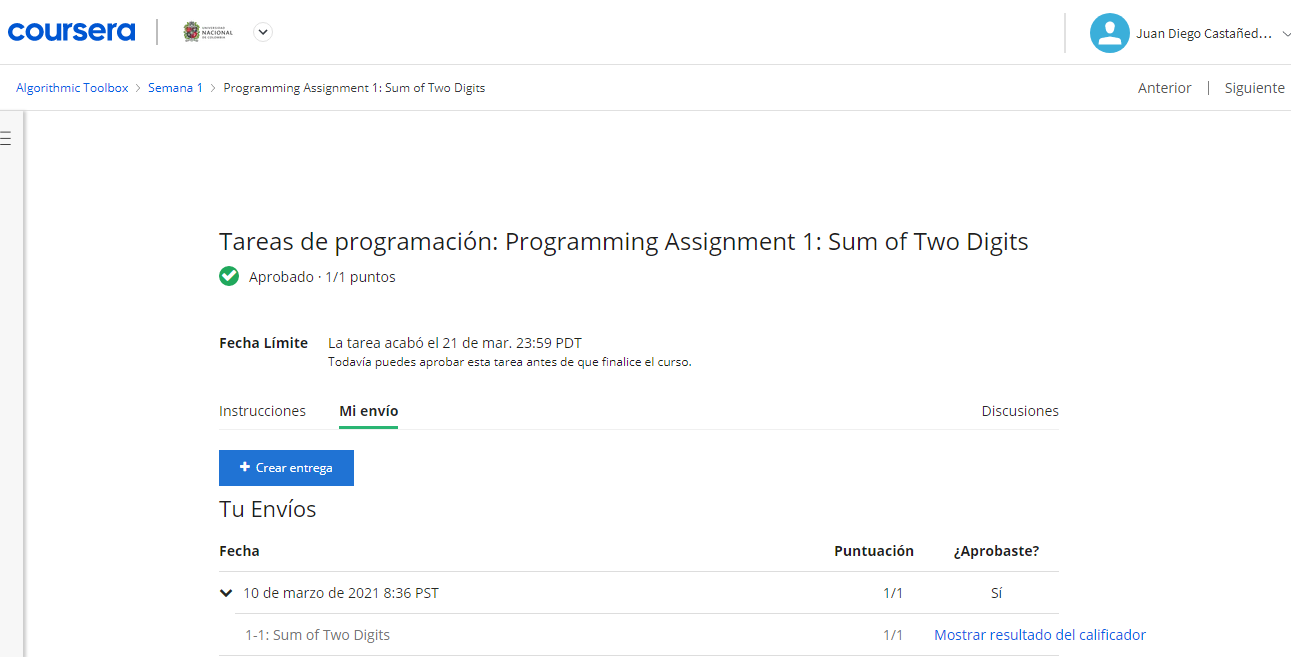

Maximum Pairwise Product:

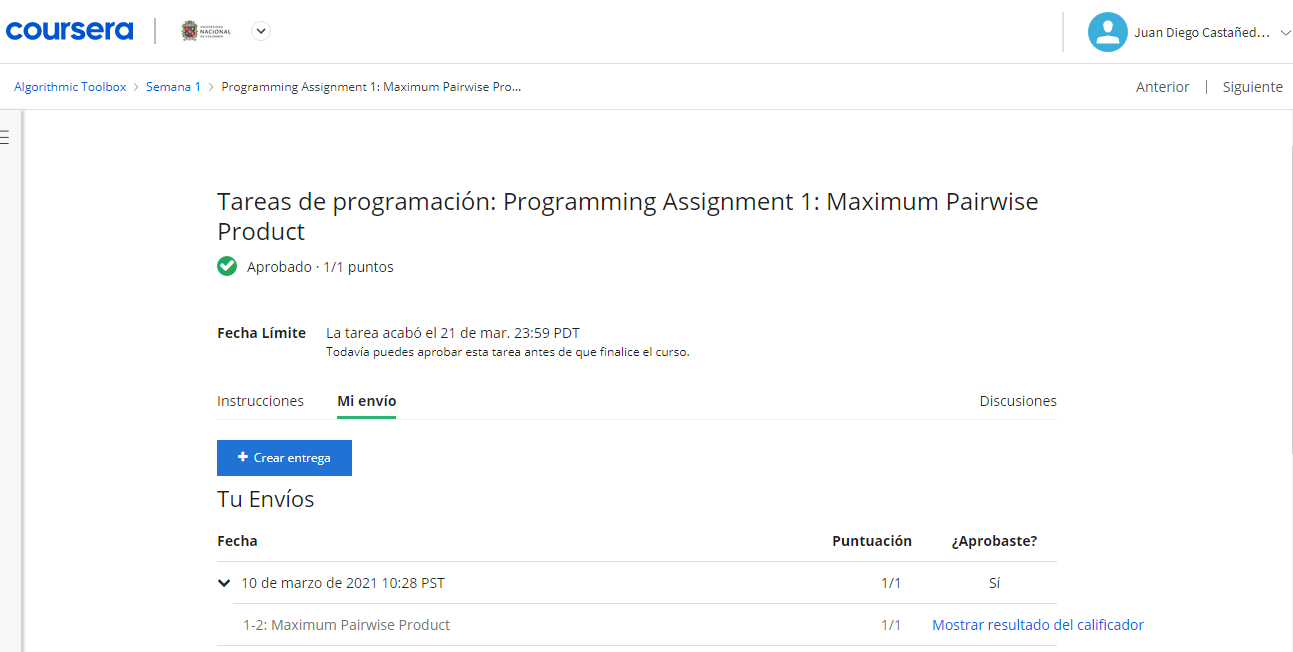